# Dataset: 
https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data


# Dataset information
Data Set Information:

The dataset is about bankruptcy prediction of Polish companies. The data was collected from Emerging Markets Information Service (EMIS, [Web Link]), which is a database containing information on emerging markets around the world. The bankrupt companies were analyzed in the period 2000-2012, while the still operating companies were evaluated from 2007 to 2013.
Basing on the collected data five classification cases were distinguished, that depends on the forecasting period:
- 1stYear â€“ the data contains financial rates from 1st year of the forecasting period and corresponding class label that indicates bankruptcy status after 5 years. The data contains 7027 instances (financial statements), 271 represents bankrupted companies, 6756 firms that did not bankrupt in the forecasting period.
- 2ndYear â€“ the data contains financial rates from 2nd year of the forecasting period and corresponding class label that indicates bankruptcy status after 4 years. The data contains 10173 instances (financial statements), 400 represents bankrupted companies, 9773 firms that did not bankrupt in the forecasting period.
- 3rdYear â€“ the data contains financial rates from 3rd year of the forecasting period and corresponding class label that indicates bankruptcy status after 3 years. The data contains 10503 instances (financial statements), 495 represents bankrupted companies, 10008 firms that did not bankrupt in the forecasting period.
- 4thYear â€“ the data contains financial rates from 4th year of the forecasting period and corresponding class label that indicates bankruptcy status after 2 years. The data contains 9792 instances (financial statements), 515 represents bankrupted companies, 9277 firms that did not bankrupt in the forecasting period.
- 5thYear â€“ the data contains financial rates from 5th year of the forecasting period and corresponding class label that indicates bankruptcy status after 1 year. The data contains 5910 instances (financial statements), 410 represents bankrupted companies, 5500 firms that did not bankrupt in the forecasting period.





# Attribute Information:

    X1 net profit / total assets
    *X2 total liabilities / total assets
    *X3 working capital / total assets
    X4 current assets / short-term liabilities
    X5 [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365
    *X6 retained earnings / total assets
    X7 EBIT / total assets
    X8 book value of equity / total liabilities
    X9 sales / total assets
    *X10 equity / total assets
    X11 (gross profit + extraordinary items + financial expenses) / total assets
    X12 gross profit / short-term liabilities
    X13 (gross profit + depreciation) / sales
    X14 (gross profit + interest) / total assets
    X15 (total liabilities * 365) / (gross profit + depreciation)
    X16 (gross profit + depreciation) / total liabilities
    *X17 total assets / total liabilities
    X18 gross profit / total assets
    X19 gross profit / sales
    X20 (inventory * 365) / sales
    X21 sales (n) / sales (n-1)
    *X22 profit on operating activities / total assets
    X23 net profit / sales
    *X24 gross profit (in 3 years) / total assets
    *X25 (equity - share capital) / total assets
    X26 (net profit + depreciation) / total liabilities
    X27 profit on operating activities / financial expenses
    X28 working capital / fixed assets
    X29 logarithm of total assets
    *X30 (total liabilities - cash) / sales
    X31 (gross profit + interest) / sales
    X32 (current liabilities * 365) / cost of products sold
    X33 operating expenses / short-term liabilities
    X34 operating expenses / total liabilities
    *X35 profit on sales / total assets
    X36 total sales / total assets
    X37 (current assets - inventories) / long-term liabilities
    X38 constant capital / total assets
    X39 profit on sales / sales
    X40 (current assets - inventory - receivables) / short-term liabilities
    X41 total liabilities / ((profit on operating activities + depreciation) * (12/365))
    X42 profit on operating activities / sales
    X43 rotation receivables + inventory turnover in days
    X44 (receivables * 365) / sales
    X45 net profit / inventory
    X46 (current assets - inventory) / short-term liabilities
    X47 (inventory * 365) / cost of products sold
    X48 EBITDA (profit on operating activities - depreciation) / total assets
    X49 EBITDA (profit on operating activities - depreciation) / sales
    X50 current assets / total liabilities
    X51 short-term liabilities / total assets
    X52 (short-term liabilities * 365) / cost of products sold)
    X53 equity / fixed assets
    X54 constant capital / fixed assets
    X55 working capital
    X56 (sales - cost of products sold) / sales
    X57 (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)
    X58 total costs /total sales
    X59 long-term liabilities / equity
    X60 sales / inventory
    X61 sales / receivables
    X62 (short-term liabilities *365) / sales
    X63 sales / short-term liabilities
    X64 sales / fixed assets

### I Decided to focus on 3/3 dataset 

Commment: 
Forecasting default in the 3-year period is very difficult task as we have factors not strictly connected with financial indicators and the period is very long.
As we can assume the highest impact on default probability have indicators connected with profits, capital na liabilites (marked by asterisk)




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
col= []
for a in range(1,65):
    col.append('x'+str(a))
col.append('y')

In [212]:
df = pd.read_csv('c://PythonScripts/Project2/3year.csv',header=None,names = col )


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (14,23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# EDA

### OBSERVATIONS AND DECISIONS:
    1. High imbalance.
    2. Too many missing values (x37) - i decided to remove this column.
    3. Na's in sales n /sales n-1  (x21) i decided to replace with 1 (no changes in sales).
    4. Rest of na's replace with mean.

In [4]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x56,x57,x58,x59,x60,x61,x62,x63,x64,y
0,0.174190,0.41299,0.14371,1.348,-28.982,0.60383,0.219460,1.1225,1.1961,0.46359,...,0.16396,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,0
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.19,3.5716,5.95,0
2,0.000595,0.22612,0.48839,3.1599,84.874,0.19114,0.004572,2.9881,1.0077,0.67566,...,0.0076387,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,0
3,0.024526,0.43236,0.27546,1.7833,-10.105,0.56944,0.024526,1.3057,1.0509,0.56453,...,0.048398,0.043445,0.9516,0.142980,4.2286,5.0528,98.783,3.695,3.4844,0
4,0.188290,0.41504,0.34231,1.9279,-58.274,0.00000,0.233580,1.4094,1.3393,0.58496,...,0.17648,0.321880,0.82635,0.073039,2.5912,7.0756,100.54,3.6303,4.6375,0


In [213]:
df.replace('?',np.NaN,inplace=True)

In [214]:
df.isnull().sum().sort_values(ascending=False)


x37    4736
x21     807
x27     715
x60     592
x45     591
       ... 
x10       0
x7        0
x6        0
x3        0
y         0
Length: 65, dtype: int64

In [215]:
del df['x37']
df.x21.fillna(1,inplace=True)

In [216]:
df = df.astype('float')

In [9]:
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x56,x57,x58,x59,x60,x61,x62,x63,x64,y
0,0.174190,0.41299,0.143710,1.34800,-28.9820,0.603830,0.219460,1.122500,1.19610,0.463590,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,0.0
1,0.146240,0.46038,0.282300,1.62940,2.5952,0.000000,0.171850,1.172100,1.60180,0.539620,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,0.0
2,0.000595,0.22612,0.488390,3.15990,84.8740,0.191140,0.004572,2.988100,1.00770,0.675660,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,0.0
3,0.024526,0.43236,0.275460,1.78330,-10.1050,0.569440,0.024526,1.305700,1.05090,0.564530,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,0.0
4,0.188290,0.41504,0.342310,1.92790,-58.2740,0.000000,0.233580,1.409400,1.33930,0.584960,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10498,0.002861,0.58067,-0.223860,0.51658,-31.8660,0.002861,0.002861,0.618550,1.01200,0.359170,...,0.011834,0.007966,0.98817,0.327360,38.1420,39.1500,42.202,8.6489,5.2646,1.0
10499,-0.051968,0.55254,0.147150,2.16980,12.7480,-0.051968,-0.034361,0.669830,0.94694,0.370110,...,-0.056037,-0.140410,1.05600,1.153000,14.4930,9.2851,32.761,11.1410,1.9276,1.0
10500,-0.135900,0.83954,-0.342010,0.46526,-145.3100,-0.219120,-0.131860,0.191130,1.09990,0.160460,...,0.144120,-0.846930,0.85427,0.814200,6.2737,9.6966,212.230,1.7198,1.5659,1.0
10501,0.009423,0.50028,0.261630,1.52300,-10.1580,0.009423,0.007700,0.989900,1.01230,0.495230,...,0.012186,0.019027,0.98781,0.000000,5.9675,4.3536,98.240,3.7154,7.8068,1.0


In [217]:
df= df.apply(lambda x: x.fillna(x.mean()),axis=0)

In [218]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x56,x57,x58,x59,x60,x61,x62,x63,x64,y
count,10503.000000,10503.000000,10503.000000,10503.000000,1.050300e+04,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,...,10503.000000,10503.000000,10503.000000,10503.000000,1.050300e+04,10503.000000,1.050300e+04,10503.000000,10503.000000,10503.000000
mean,0.052844,0.619911,0.095490,9.980499,-1.347662e+03,-0.121159,0.065624,19.140113,1.819254,0.366093,...,-0.530082,-0.014817,3.848794,1.429319,5.713363e+02,13.935361,1.355370e+02,9.095149,35.766800,0.047129
std,0.647797,6.427041,6.420056,523.242965,1.184393e+05,6.970625,0.651152,717.278172,7.580576,6.428603,...,55.863890,18.684047,189.938434,77.273270,3.609713e+04,83.636328,2.593790e+04,31.392159,423.623594,0.211926
min,-17.692000,0.000000,-479.730000,0.002080,-1.190300e+07,-508.120000,-17.692000,-2.081800,-1.215700,-479.730000,...,-5691.700000,-1667.300000,-198.690000,-172.070000,0.000000e+00,-6.590300,-2.336500e+06,-0.000156,-0.000102,0.000000
25%,0.000686,0.253955,0.017461,1.040900,-5.258200e+01,0.000000,0.002118,0.431935,1.011350,0.297340,...,0.004681,0.006796,0.875700,0.000000,5.734300e+00,4.490600,4.092850e+01,3.064050,2.055600,0.000000
50%,0.043034,0.464140,0.198560,1.608500,1.360200e+00,0.000000,0.050945,1.113000,1.199100,0.515500,...,0.051303,0.106880,0.953350,0.002976,1.062100e+01,6.680900,7.092300e+01,5.149500,4.200700,0.000000
75%,0.123805,0.689330,0.419545,2.967250,5.588350e+01,0.072584,0.142275,2.868250,2.059000,0.725635,...,0.129605,0.271310,0.996215,0.240320,2.583150e+01,10.639500,1.191500e+02,8.920650,10.368000,0.000000
max,52.652000,480.730000,17.708000,53433.000000,6.854400e+05,45.533000,52.652000,53432.000000,740.440000,11.837000,...,293.150000,552.640000,18118.000000,7617.300000,3.660200e+06,4470.400000,1.073500e+06,1974.500000,21499.000000,1.000000


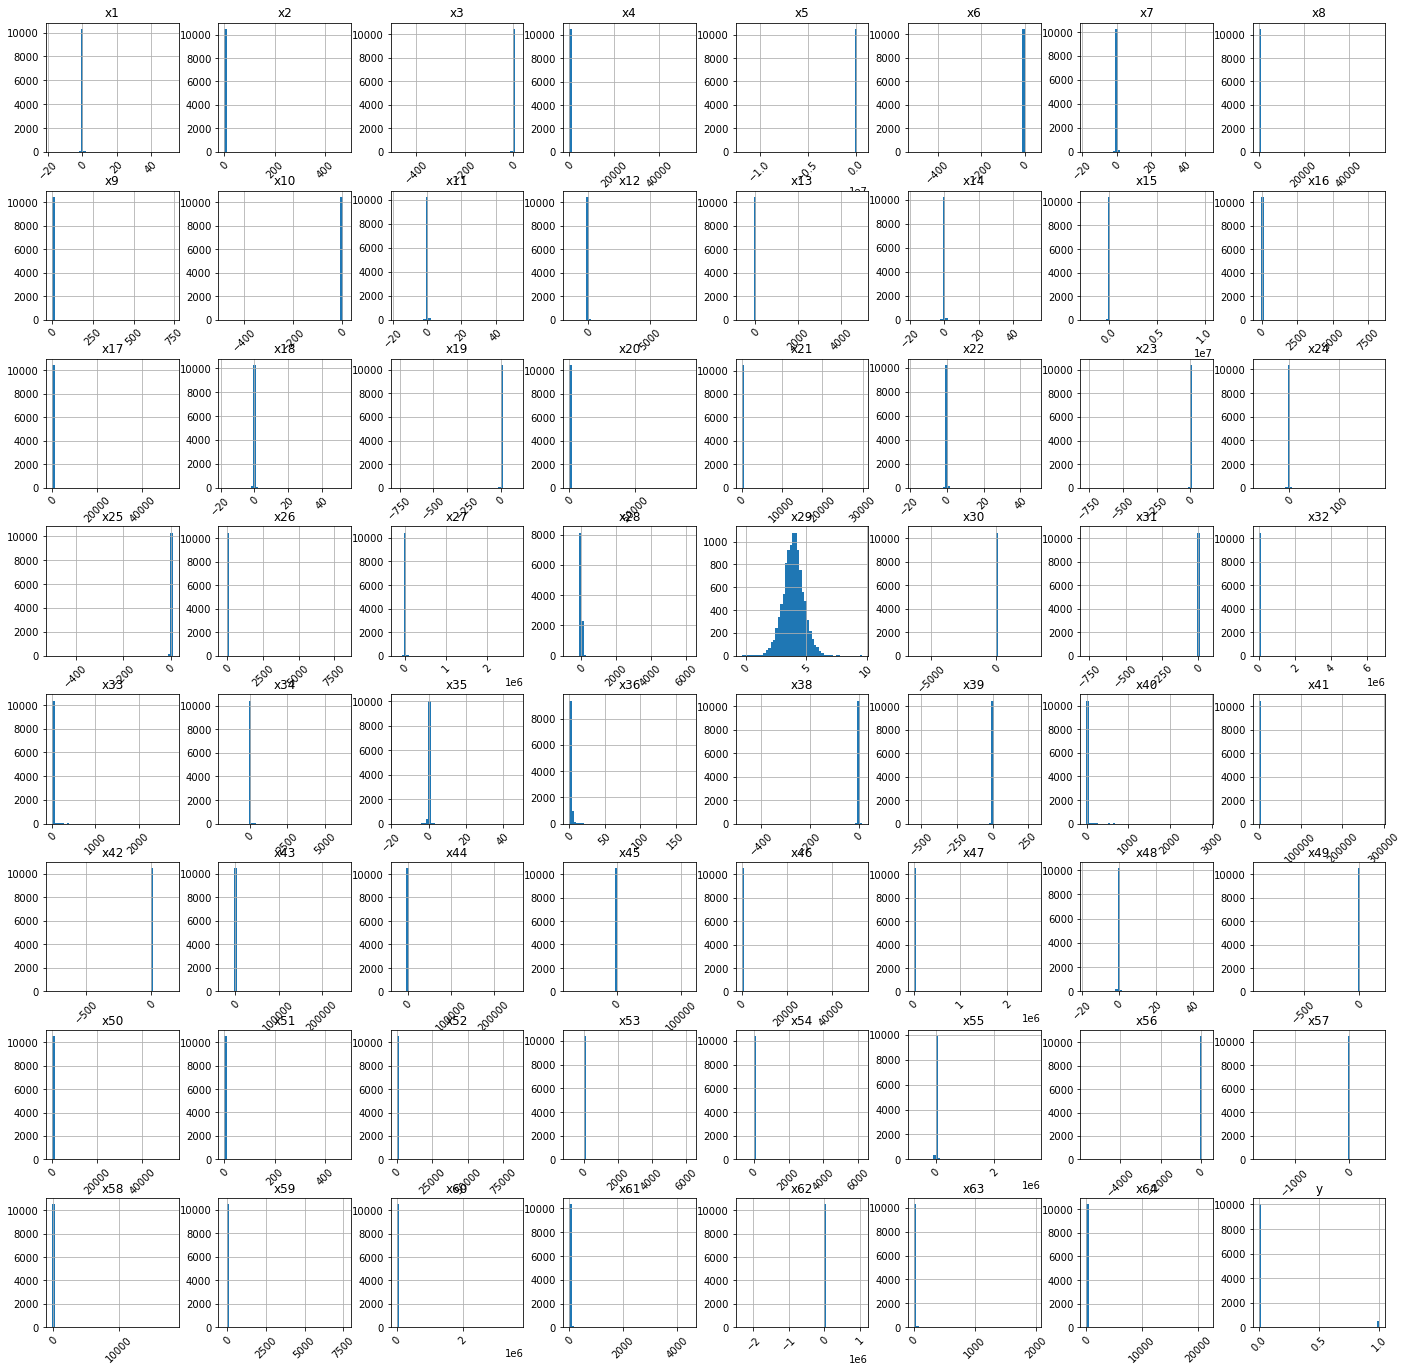

In [12]:
df.hist(figsize=(24,24), xrot=45,bins=50)
plt.show()

### IMPORTANCE OF FEATURES

In [219]:
#CORRELATION - I put into the model only features with y-correlation > 0.005
ind = abs(df.corrwith(df.y)[abs(df.corrwith(df.y)) > 0.005]).sort_values(ascending=False).index
abs(df.corrwith(df.y)[abs(df.corrwith(df.y)) > 0.005]).sort_values(ascending=False)

y      1.000000
x35    0.044667
x22    0.040349
x25    0.036898
x10    0.035747
x2     0.035560
x38    0.035348
x3     0.034292
x51    0.034146
x24    0.033583
x6     0.033081
x29    0.031104
x14    0.028524
x7     0.028521
x1     0.027089
x11    0.026957
x48    0.025347
x18    0.023594
x33    0.022496
x36    0.020230
x55    0.019179
x12    0.011168
x57    0.009320
x30    0.008078
x62    0.007020
x54    0.005615
x61    0.005382
x16    0.005258
x26    0.005116
dtype: float64

In [220]:
ind

Index(['y', 'x35', 'x22', 'x25', 'x10', 'x2', 'x38', 'x3', 'x51', 'x24', 'x6',
       'x29', 'x14', 'x7', 'x1', 'x11', 'x48', 'x18', 'x33', 'x36', 'x55',
       'x12', 'x57', 'x30', 'x62', 'x54', 'x61', 'x16', 'x26'],
      dtype='object')

### Decision: 
* removing rest of the features

In [221]:
df_small = df[ind]

In [222]:
df_small

,y,x35,x22,x25,x10,x2,x38,x3,x51,x24,...,x36,x55,x12,x57,x30,x62,x54,x61,x16,x26
0,0.0,0.295100,0.295100,0.463590,0.463590,0.41299,0.46359,0.143710,0.41299,0.756410,...,1.8079,127280.0,0.531390,0.375740,0.224930,84.291,1.04580,6.2813,0.616300,0.506690
1,0.0,0.044076,0.175710,0.175230,0.539620,0.46038,0.53962,0.282300,0.44849,0.211936,...,1.6018,3387.8,0.383170,0.271000,0.243840,102.190,2.00440,4.1103,0.440040,0.384420
2,0.0,0.040610,0.040610,0.675660,0.675660,0.22612,0.67566,0.488390,0.22612,0.234700,...,1.3425,20453.0,0.020219,0.000881,0.036196,64.846,2.36670,3.7922,0.174300,0.156720
3,0.0,0.055446,0.055446,0.564530,0.564530,0.43236,0.64524,0.275460,0.35164,0.569440,...,1.3068,5012.6,0.069747,0.043445,0.286240,98.783,1.73030,5.0528,0.110630,0.110630
4,0.0,0.236350,0.234930,0.572500,0.584960,0.41504,0.62769,0.342310,0.36891,0.000000,...,1.3393,13730.0,0.633170,0.321880,0.306910,100.540,2.17350,7.0756,0.606000,0.496870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10498,1.0,0.026943,0.026943,0.359170,0.359170,0.58067,0.47675,-0.223860,0.46309,0.002861,...,4.0103,-4321.5,0.006178,0.007966,0.140800,42.202,0.62666,39.1500,0.126770,0.126770
10499,1.0,-0.043590,-0.043590,0.370110,0.370110,0.55254,0.79685,0.147150,0.12579,-0.034361,...,1.4780,13488.0,-0.273160,-0.140410,0.376410,32.761,1.09600,9.2851,0.053084,0.021220
10500,1.0,-0.111170,-0.097358,-0.275830,0.160460,0.83954,0.29110,-0.342010,0.63957,-0.131860,...,1.1871,-4233.0,-0.206160,-0.846930,0.756070,212.230,0.41442,9.6966,-0.157060,-0.161870
10501,1.0,0.023370,0.023370,0.495230,0.495230,0.50028,0.49523,0.261630,0.50028,0.007700,...,1.8760,2686.9,0.015392,0.019027,0.257280,98.240,2.08000,4.3536,0.053763,0.057206


### CORRELATION BETWEEN FEATURES

In [223]:
df_cor = df_small.corr()

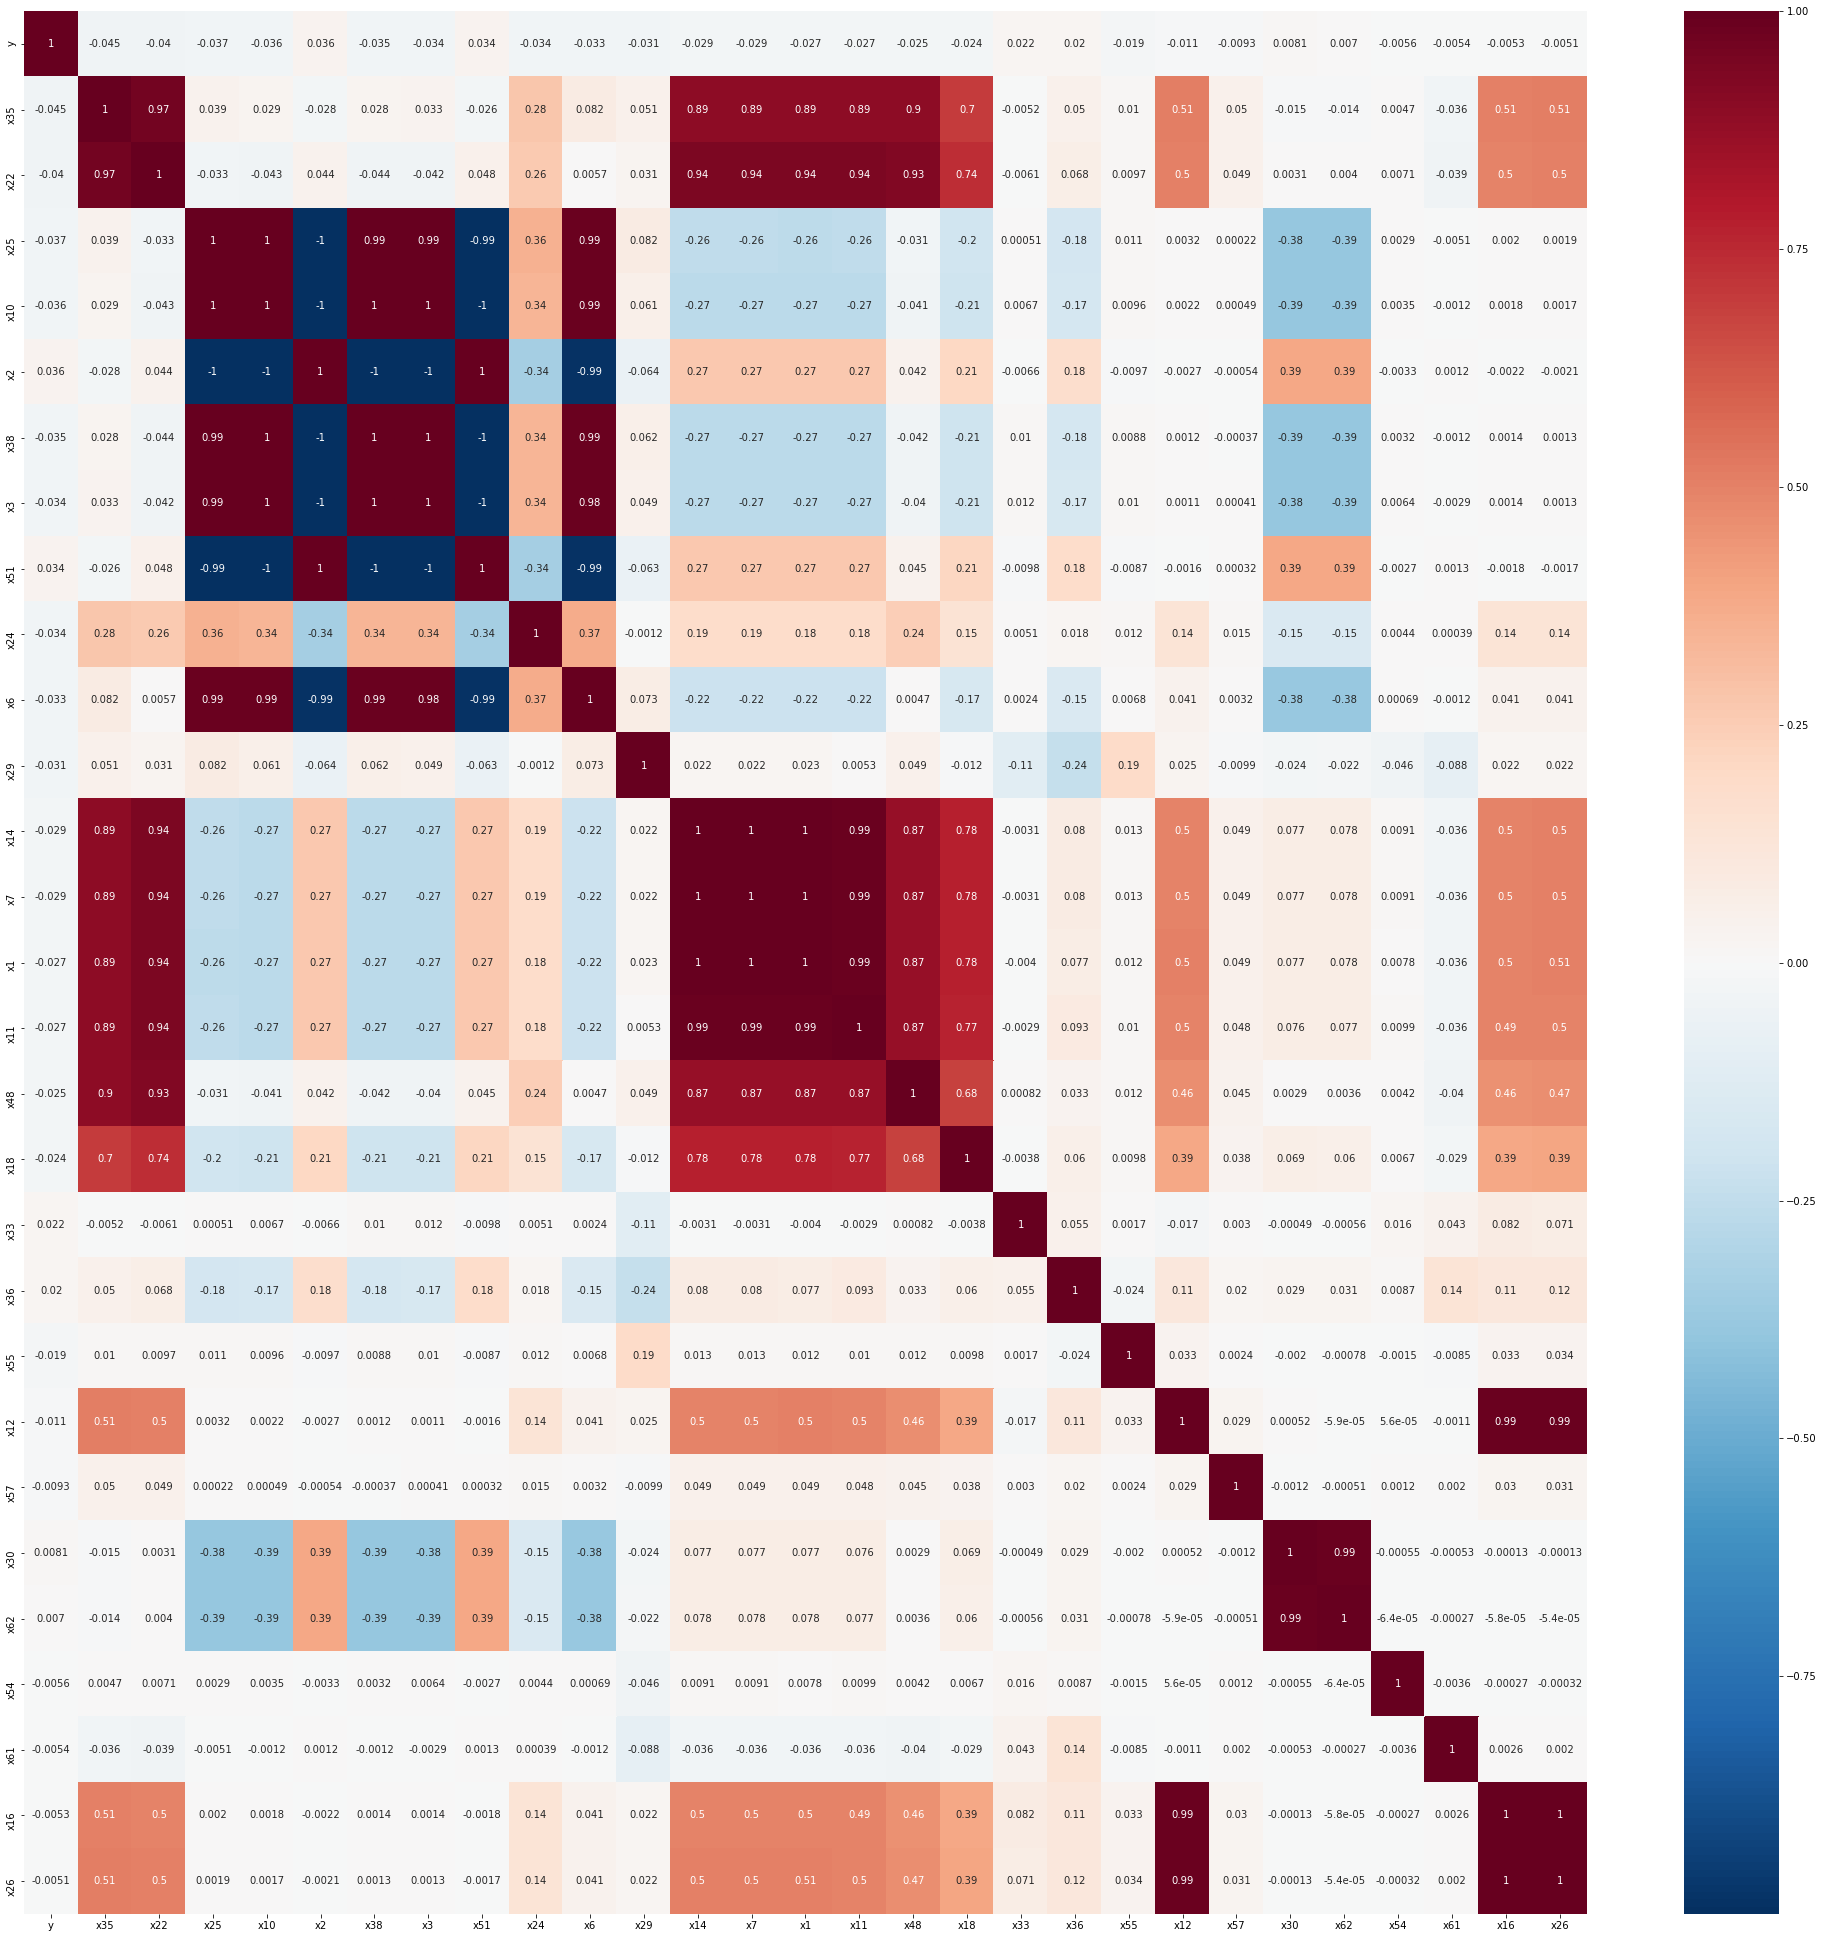

In [224]:
plt.figure(figsize=(35,35))
sns.heatmap(df_cor, cmap='RdBu_r', annot=True)
plt.show()

### OBSERVATIONS AND DECISIONS:
1. Many high-correlated features
2. I decide to remove one of the pair of  features corelated -> (>abs(0.9))

In [225]:
df_cor.index

Index(['y', 'x35', 'x22', 'x25', 'x10', 'x2', 'x38', 'x3', 'x51', 'x24', 'x6',
       'x29', 'x14', 'x7', 'x1', 'x11', 'x48', 'x18', 'x33', 'x36', 'x55',
       'x12', 'x57', 'x30', 'x62', 'x54', 'x61', 'x16', 'x26'],
      dtype='object')

In [20]:
list_of_high_cor = []
for r in df_cor.index:
    for k in df_cor.columns:
        if abs(df_cor.loc[r,k])>0.9:
            if r != k:
                list_of_high_cor.append((r,k))
    

In [226]:
list_of_high_cor

[('x35', 'x22'),
 ('x22', 'x35'),
 ('x22', 'x14'),
 ('x22', 'x7'),
 ('x22', 'x1'),
 ('x22', 'x11'),
 ('x22', 'x48'),
 ('x25', 'x10'),
 ('x25', 'x2'),
 ('x25', 'x38'),
 ('x25', 'x3'),
 ('x25', 'x51'),
 ('x25', 'x6'),
 ('x10', 'x25'),
 ('x10', 'x2'),
 ('x10', 'x38'),
 ('x10', 'x3'),
 ('x10', 'x51'),
 ('x10', 'x6'),
 ('x2', 'x25'),
 ('x2', 'x10'),
 ('x2', 'x38'),
 ('x2', 'x3'),
 ('x2', 'x51'),
 ('x2', 'x6'),
 ('x38', 'x25'),
 ('x38', 'x10'),
 ('x38', 'x2'),
 ('x38', 'x3'),
 ('x38', 'x51'),
 ('x38', 'x6'),
 ('x3', 'x25'),
 ('x3', 'x10'),
 ('x3', 'x2'),
 ('x3', 'x38'),
 ('x3', 'x51'),
 ('x3', 'x6'),
 ('x51', 'x25'),
 ('x51', 'x10'),
 ('x51', 'x2'),
 ('x51', 'x38'),
 ('x51', 'x3'),
 ('x51', 'x6'),
 ('x6', 'x25'),
 ('x6', 'x10'),
 ('x6', 'x2'),
 ('x6', 'x38'),
 ('x6', 'x3'),
 ('x6', 'x51'),
 ('x14', 'x22'),
 ('x14', 'x7'),
 ('x14', 'x1'),
 ('x14', 'x11'),
 ('x7', 'x22'),
 ('x7', 'x14'),
 ('x7', 'x1'),
 ('x7', 'x11'),
 ('x1', 'x22'),
 ('x1', 'x14'),
 ('x1', 'x7'),
 ('x1', 'x11'),
 ('x11', 'x22

In [227]:
df_without_cor = df_small.drop(['x22','x10','x2','x38','x3','x51','x10','x6','x14','x11','x7','x26','x16','x62'],axis=1)
 
 #('x25', 'x6''x16','x26','x8','x19','x25','x3','x38','x51','x52','x6','x31','x42','x49','x53','x54','x62','x38','x46','x50','x44','x35','x48'], axis=1)

In [228]:
df_without_cor


,y,x35,x25,x24,x29,x1,x48,x18,x33,x36,x55,x12,x57,x30,x54,x61
0,0.0,0.295100,0.463590,0.756410,5.9473,0.174190,0.260030,0.219460,3.6203,1.8079,127280.0,0.531390,0.375740,0.224930,1.04580,6.2813
1,0.0,0.044076,0.175230,0.211936,4.0792,0.146240,0.144970,0.171850,3.4733,1.6018,3387.8,0.383170,0.271000,0.243840,2.00440,4.1103
2,0.0,0.040610,0.675660,0.234700,4.6220,0.000595,0.005769,0.004572,5.5857,1.3425,20453.0,0.020219,0.000881,0.036196,2.36670,3.7922
3,0.0,0.055446,0.564530,0.569440,4.2600,0.024526,0.032141,0.024526,3.5161,1.3068,5012.6,0.069747,0.043445,0.286240,1.73030,5.0528
4,0.0,0.236350,0.572500,0.000000,4.6033,0.188290,0.216990,0.233580,2.9897,1.3393,13730.0,0.633170,0.321880,0.306910,2.17350,7.0756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10498,1.0,0.026943,0.359170,0.002861,4.2857,0.002861,-0.043805,0.002861,8.5466,4.0103,-4321.5,0.006178,0.007966,0.140800,0.62666,39.1500
10499,1.0,-0.043590,0.370110,-0.034361,4.9622,-0.051968,-0.107280,-0.034361,11.7660,1.4780,13488.0,-0.273160,-0.140410,0.376410,1.09600,9.2851
10500,1.0,-0.111170,-0.275830,-0.131860,4.0926,-0.135900,-0.097358,-0.131860,2.0074,1.1871,-4233.0,-0.206160,-0.846930,0.756070,0.41442,9.6966
10501,1.0,0.023370,0.495230,0.007700,4.0116,0.009423,0.004173,0.007700,3.6701,1.8760,2686.9,0.015392,0.019027,0.257280,2.08000,4.3536


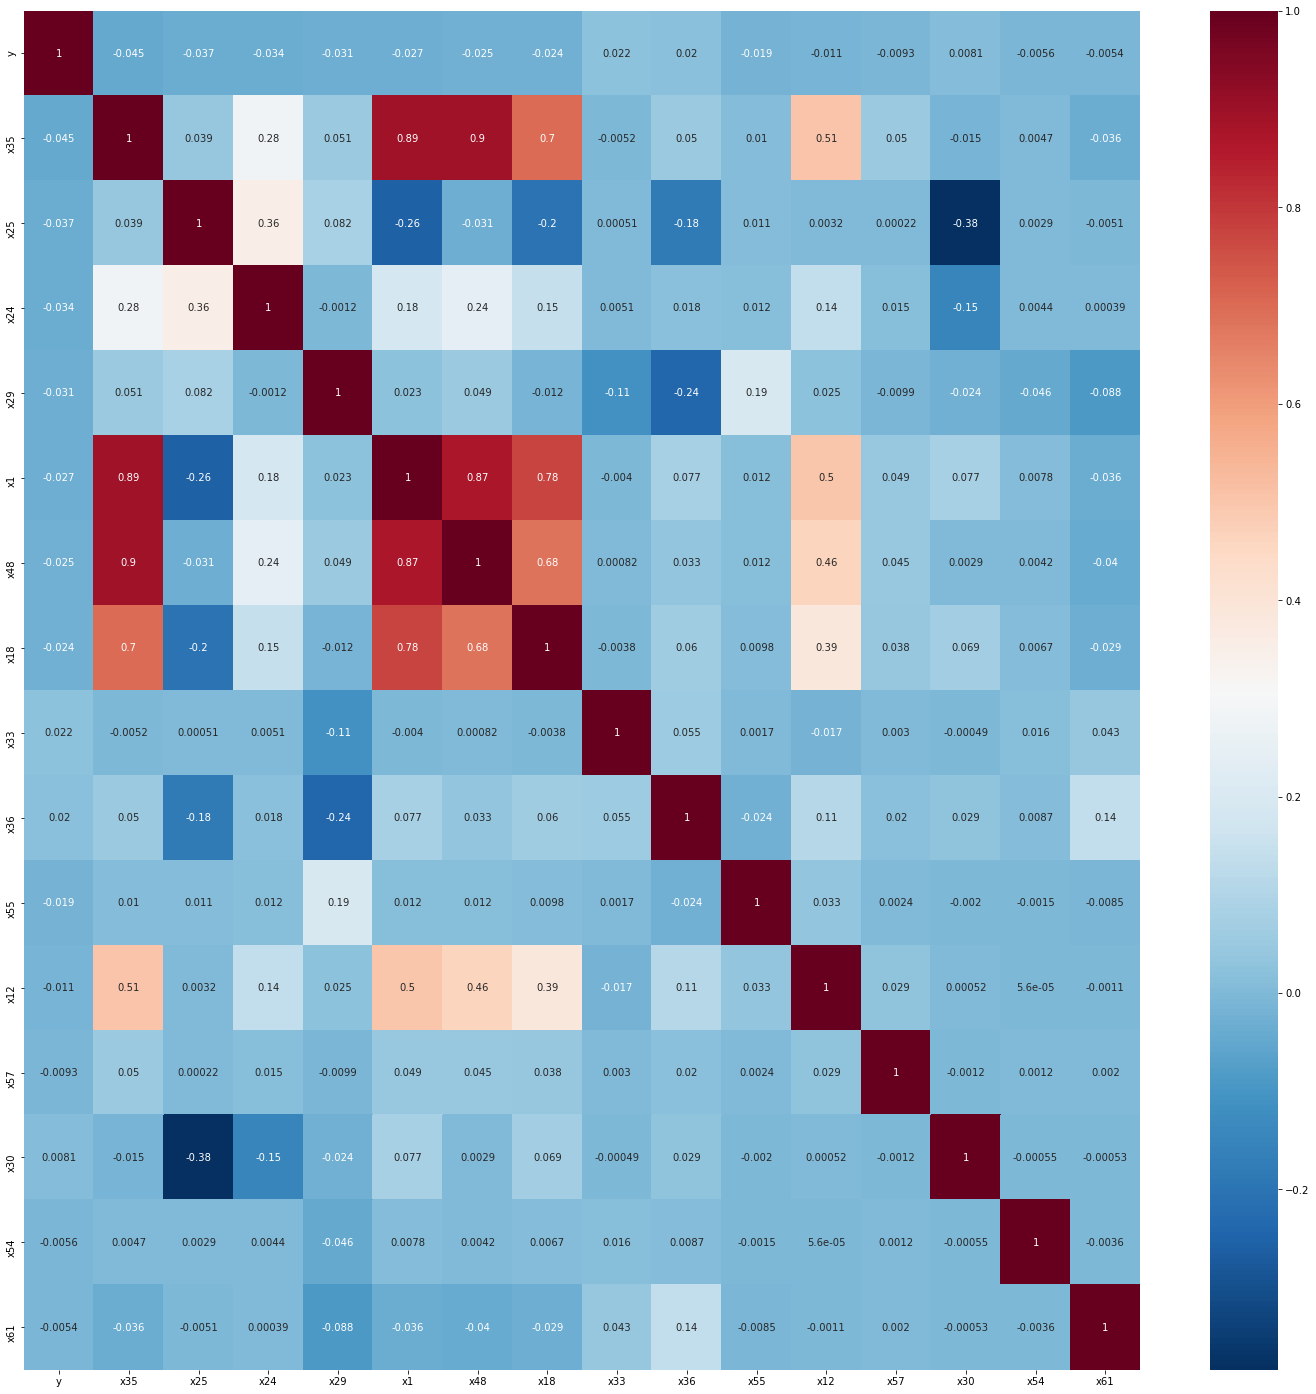

In [229]:
plt.figure(figsize=(25,25))
sns.heatmap(df_without_cor.corr(), cmap='RdBu_r', annot=True)
plt.show()

### SPLITING THE DATA WITH STRATIFY OPTION

In [230]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df_without_cor,test_size = 0.2, random_state=1, stratify=df_without_cor.y)

len(df_full_train), len(df_test), len(df_test)/len(df_full_train)
print(df_full_train.y.mean())
print(df_test.y.mean())


0.047131635324922636
0.04712041884816754


In [231]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=1,stratify=df_full_train.y)
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values
y_full_train = df_full_train.y.values
del df_train['y']
del df_val['y']
del df_test['y']
del df_full_train['y']
    

In [232]:
df_train

,x35,x25,x24,x29,x1,x48,x18,x33,x36,x55,x12,x57,x30,x54,x61
4324,0.288210,0.51375,0.867850,4.1440,0.243920,0.263010,0.304140,7.4048,3.50900,7011.00,0.715470,0.474780,0.017509,7.21040,9.4939
7318,0.137410,0.60582,0.236780,4.3904,0.092173,0.096947,0.115610,3.8259,1.30840,6535.20,0.385710,0.152150,0.223050,1.61250,4.0689
9391,0.108990,0.15803,0.326060,2.8523,0.033186,0.055956,0.062227,11.7330,5.04240,387.06,0.147990,0.057263,-0.002109,16.22900,9.8313
10349,-0.010210,0.99442,0.343890,5.6539,0.286690,-0.010475,0.343890,1.9459,0.35431,23505.00,65.540000,0.288290,0.459346,1.05500,0.0000
9789,0.179520,0.36051,0.214020,4.2463,0.133060,0.090092,0.167100,6.8403,1.79270,4828.40,0.708530,0.231340,0.219630,1.53020,5.5500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,0.369120,-0.28405,0.211936,3.4176,0.290330,0.319450,0.328500,4.2941,2.57810,1022.60,0.638570,0.879910,0.156630,5.13190,8.9113
9727,0.076430,0.48815,0.330890,3.8277,0.037585,-0.009555,0.037585,6.4593,1.99220,1973.90,0.143790,0.060342,0.059568,1.46960,13.5220
613,0.035242,0.58622,-0.000841,2.8432,-0.020326,0.014723,-0.007263,5.8215,1.28890,154.10,-0.033728,-0.030892,0.260500,1.33330,6.1424
5643,0.054426,0.74101,0.213260,4.2656,0.078953,0.039791,0.095606,5.4619,1.12530,9165.60,0.511600,0.106550,-0.381660,2.34620,5.3529


In [233]:
df_full_train

,x35,x25,x24,x29,x1,x48,x18,x33,x36,x55,x12,x57,x30,x54,x61
6347,-0.171340,-0.189810,-0.694320,1.7114,-0.142340,-0.085293,-0.142340,4.0010,0.66928,40.637,-0.677490,-0.182010,0.193800,6.708568,0.79358
130,0.062612,0.497310,0.211936,3.9220,0.039419,0.046778,0.039419,1.6016,0.47395,4417.000,0.153480,0.072019,0.954610,3.462200,3.60070
6204,0.019528,0.778640,0.694270,4.4128,0.010683,-0.018126,0.018084,6.4478,1.31980,17903.000,0.091670,0.013720,-0.015889,7.223100,15.40800
7188,0.059631,0.641790,0.239970,4.1460,0.044208,0.019251,0.052399,11.2960,3.43490,3119.100,0.175200,0.066314,0.093505,1.418400,11.55200
4030,-0.010722,0.314010,0.066327,3.0270,-0.013078,-0.010657,-0.013078,2.6797,1.32380,534.130,-0.026260,-0.026054,0.340510,6.708568,4.82200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,0.505130,0.891890,0.954980,4.2447,0.411660,0.474780,0.509270,11.2420,1.67110,13748.000,4.930900,0.461560,-0.125530,7.813300,5.56220
5542,0.108910,0.354150,0.445710,4.0936,0.084417,0.084391,0.084417,3.3480,1.46830,3712.200,0.209600,0.238370,0.333070,1.779500,3.63570
9344,-0.063494,0.314530,0.053268,4.6500,-0.098320,-0.140470,-0.115820,5.2913,1.13330,12391.000,-0.573100,-0.312600,0.550360,1.513200,6.40750
3636,-0.160150,0.415500,0.467200,2.9466,-0.114370,-0.129020,-0.114370,11.1990,5.70540,382.930,-0.218360,-0.242280,0.006292,10.918000,14.05200


In [234]:
df_train.reset_index(drop=True,inplace=True)
df_val.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)
df_full_train.reset_index(drop=True,inplace=True)


### FIRST TESTING MODEL - LOGISTIC REGRESSION

In [235]:
X_train = np.array(df_train)
X_val = np.array(df_val)

In [236]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="liblinear", C=1.0, random_state=42)

In [237]:
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [238]:
y_pred = model.predict_proba(X_val)[:, 1]

In [239]:
y_pred

array([0.02796732, 0.04905758, 0.0468664 , ..., 0.02215457, 0.07586443,
       0.02655347])

In [240]:
from sklearn.metrics import accuracy_score
threshold =  (y_pred>=0.5)
accuracy_score(threshold,y_val)

0.9519276534983341

In [241]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_val,y_pred)
auc

0.5851724033542216

In [242]:
from sklearn.metrics import average_precision_score

average_precision_score(y_val,y_pred)

0.06284257640382171

#### OBSERVATIONS:
    1. Low performance with Non-scaled features.
    2. I decided to use StandardScaler

In [243]:
from sklearn.preprocessing import StandardScaler

In [244]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(np.array(df_train))
X_val = sc_X.transform(np.array(df_val))
X_test = sc_X.transform(np.array(df_test))
X_full_train = sc_X.transform(np.array(df_full_train))

In [449]:
X_full_train.shape

(8402, 15)

In [443]:
model = LogisticRegression(solver="liblinear", C=1.0, random_state=42)

In [444]:
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [451]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred_test = model.predict_proba(X_test)[:,1]
y_pred

array([0.04207066, 0.04026485, 0.05022583, ..., 0.04773524, 0.04020883,
       0.05073077])

In [452]:
succ_lvl = (y_pred>=0.5)
accuracy_score(succ_lvl,y_val)



0.9528795811518325

In [453]:
auc = roc_auc_score(y_val,y_pred)
auc

0.7089022089022089

In [454]:
average_precision_score(y_val,y_pred)

0.10358436464015515

#### OBSERVATION: Better performance of the model with scaled features

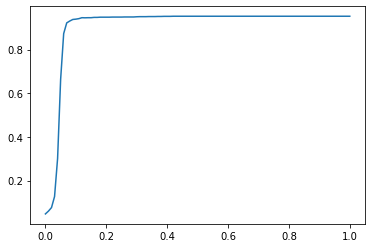

In [252]:
thresholds = np.linspace(0,1,101)
dane_do_wykr_x = []
dane_do_wykr_y = []
for t in thresholds:
    
    y_bin = (y_pred>=t)
    score = (y_val == y_bin).mean()
    dane_do_wykr_x.append(t)
    dane_do_wykr_y.append(score)
plt.plot(dane_do_wykr_x,dane_do_wykr_y)

In [441]:
thresholds = np.linspace(0,1,101)
actual_positive = (y_val ==1)
actual_negative = (y_val == 0)
dane_do_wykr = []
for t in thresholds:
    
    predict_positive = (y_pred >=t)
    predict_negative = (y_pred<t)
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    prec = round(tp/(tp+fp),3)
    rec = round(tp / (tp+fn),3)
    print(round(t,2), prec, rec)

    dane_do_wykr.append((round(t,2), prec, rec))

0.0 0.047 1.0
0.01 0.07 0.98
0.02 0.081 0.838
0.03 0.091 0.747
0.04 0.105 0.697
0.05 0.121 0.677
0.06 0.129 0.596
0.07 0.132 0.535
0.08 0.147 0.515
0.09 0.164 0.495
0.1 0.163 0.424
0.11 0.169 0.404
0.12 0.167 0.354
0.13 0.183 0.323
0.14 0.186 0.293
0.15 0.211 0.283
0.16 0.224 0.263
0.17 0.232 0.232
0.18 0.235 0.202
0.19 0.228 0.182
0.2 0.232 0.162
0.21 0.254 0.152
0.22 0.261 0.121
0.23 0.297 0.111
0.24 0.312 0.101
0.25 0.296 0.081
0.26 0.25 0.061
0.27 0.261 0.061
0.28 0.294 0.051
0.29 0.273 0.03
0.3 0.3 0.03
0.31 0.375 0.03
0.32 0.375 0.03
0.33 0.429 0.03
0.34 0.429 0.03
0.35 0.429 0.03
0.36 0.4 0.02
0.37 0.4 0.02
0.38 0.4 0.02
0.39 0.4 0.02
0.4 0.4 0.02
0.41 0.5 0.02
0.42 0.5 0.02
0.43 0.5 0.02
0.44 0.5 0.02
0.45 0.5 0.02
0.46 1.0 0.01
0.47 1.0 0.01
0.48 1.0 0.01
0.49 1.0 0.01
0.5 nan 0.0
0.51 nan 0.0
0.52 nan 0.0
0.53 nan 0.0
0.54 nan 0.0
0.55 nan 0.0
0.56 nan 0.0
0.57 nan 0.0
0.58 nan 0.0
0.59 nan 0.0
0.6 nan 0.0
0.61 nan 0.0
0.62 nan 0.0
0.63 nan 0.0
0.64 nan 0.0
0.65 nan 0.0
0.66 

<ipython-input-441-b0fe98565453>:13: RuntimeWarning: invalid value encountered in long_scalars
  prec = round(tp/(tp+fp),3)


0.0 0.0897803247373448
0.01 0.0916030534351145
0.02 0.0916030534351145
0.03 0.09509803921568627
0.04 0.10556717948717949
0.05 0.1567640750670241
0.06 0.18025445292620867
0.07 0.13551999999999997
0.08 0.08262433862433863
0.09 0.030123456790123456
0.1 0.03148936170212766
0.11 0.03252336448598131
0.12 0.01696969696969697
0.13 0.017402597402597402
0.14 0.017701149425287357
0.15 nan
0.16 nan
0.17 nan
0.18 nan
0.19 nan
0.2 nan
0.21 nan
0.22 nan
0.23 nan
0.24 nan
0.25 nan
0.26 nan
0.27 nan
0.28 nan
0.29 nan
0.3 nan
0.31 nan
0.32 nan
0.33 nan
0.34 nan
0.35 nan
0.36 nan
0.37 nan
0.38 nan
0.39 nan
0.4 nan
0.41 nan
0.42 nan
0.43 nan
0.44 nan
0.45 nan
0.46 nan
0.47 nan
0.48 nan
0.49 nan
0.5 nan
0.51 nan
0.52 nan
0.53 nan
0.54 nan
0.55 nan
0.56 nan
0.57 nan
0.58 nan
0.59 nan
0.6 nan
0.61 nan
0.62 nan
0.63 nan
0.64 nan
0.65 nan
0.66 nan
0.67 nan
0.68 nan
0.69 nan
0.7 nan
0.71 nan
0.72 nan
0.73 nan
0.74 nan
0.75 nan
0.76 nan
0.77 nan
0.78 nan
0.79 nan
0.8 nan
0.81 nan
0.82 nan
0.83 nan
0.84 nan
0.85 

<ipython-input-455-5f94c5a502d0>:15: RuntimeWarning: invalid value encountered in double_scalars
  F1 = 2 * prec*rec/(prec+rec)
<ipython-input-455-5f94c5a502d0>:13: RuntimeWarning: invalid value encountered in long_scalars
  prec = round(tp/(tp+fp),3)


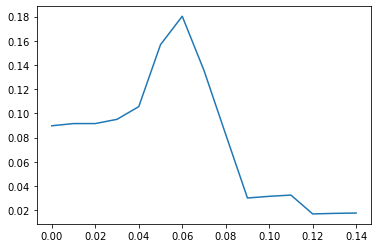

In [455]:
thresholds = np.linspace(0,1,101)
actual_positive = (y_val ==1)
actual_negative = (y_val == 0)
dane_do_wykr_f1 = []
prec_rec = []
for t in thresholds:
    predict_positive = (y_pred >=t)
    predict_negative = (y_pred<t)
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    prec = round(tp/(tp+fp),3)
    rec = round(tp / (tp+fn),3)
    F1 = 2 * prec*rec/(prec+rec)
    print(round(t,2), F1)
    prec_rec.append((t, prec,rec))
    dane_do_wykr_f1.append((round(t,2), F1))
x_plot = [x[0] for x in dane_do_wykr_f1]
y_plot = [x[1] for x in dane_do_wykr_f1]
plt.plot(x_plot,y_plot)        

In [254]:
t = 0.13
predict_positive = (y_pred >=t)
predict_negative = (y_pred<t)
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()
prec = round(tp/(tp+fp),3)
rec = round(tp / (tp+fn),3)
np.array([[tn,tp],[fn,tp]])

array([[1986,    1],
       [  98,    1]])

In [255]:
t = 0.10
predict_positive = (y_pred >=t)
predict_negative = (y_pred<t)
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()


conf_matrix = np.array([[tn,fp],[fn,tp]])
               
(conf_matrix/conf_matrix.sum()).round(2)

array([[0.94, 0.01],
       [0.05, 0.  ]])

### Observation:
    * with threshold above 0.13 zero true positives

In [256]:
for series in df_train:
    new_df_train = df_train.copy()
    new_df_val = df_val.copy()
    new_df_train = new_df_train.drop(series,1)
    new_df_val = new_df_val.drop(series,1)
    X_train = sc_X.fit_transform(np.array(new_df_train))
    X_val = sc_X.transform(np.array(new_df_val))
    model = LogisticRegression(solver="liblinear", C=1.0, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    #price_level = (y_pred>= 0.5)
    #accu = (y_val == price_level).mean()
    auc = roc_auc_score(y_val,y_pred)
    print(f"auc without {series} is: {auc}. Difference vs full-features-train is: {auc-0.6826506826506826}")

auc without x35 is: 0.6743912653003561. Difference vs full-features-train is: -0.008259417350326537
auc without x25 is: 0.6747040837949929. Difference vs full-features-train is: -0.007946598855689713
auc without x24 is: 0.6838237520055703. Difference vs full-features-train is: 0.0011730693548877014
auc without x29 is: 0.7089022089022089. Difference vs full-features-train is: 0.02625152625152627
auc without x1 is: 0.6828121373575918. Difference vs full-features-train is: 0.00016145470690920316
auc without x48 is: 0.6491034218306945. Difference vs full-features-train is: -0.033547260819988156
auc without x18 is: 0.678044178044178. Difference vs full-features-train is: -0.00460650460650458
auc without x33 is: 0.6794165430529067. Difference vs full-features-train is: -0.0032341395977759646
auc without x36 is: 0.6805971805971808. Difference vs full-features-train is: -0.0020535020535018544
auc without x55 is: 0.6777969505242233. Difference vs full-features-train is: -0.0048537321264593425
a

### Observation
* without x29 ROC_AUC is higher
* removing x29

In [464]:

df_train.drop('x29',1,inplace=True)
df_val.drop('x29',1,inplace=True)
df_test.drop('x29',1,inplace=True)
df_full_train.drop('x29',1,inplace=True)
X_train = sc_X.fit_transform(np.array(df_train))
X_val = sc_X.transform(np.array(df_val))
X_test = sc_X.transform(np.array(df_test))
X_full_train = sc_X.transform(np.array(df_full_train))
model = LogisticRegression(solver="liblinear", C=1.0, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_val)[:, 1]
price_level = (y_pred>= 0.5)
accu = (y_val == price_level).mean()
auc = roc_auc_score(y_val,y_pred)

KeyError: "['x29'] not found in axis"

In [258]:
auc

0.7089022089022089

In [259]:
price_level = (y_pred>= 0.5)
accu = (y_val == price_level).mean()
accu

0.9528795811518325

In [260]:
average_precision_score(y_val,y_pred)

0.10358436464015515

In [108]:
thresholds = np.linspace(0,1,101)
actual_positive = (y_val ==1)
actual_negative = (y_val == 0)
dane_do_wykr_f1 = []
for t in thresholds:
    predict_positive = (y_pred >=t)
    predict_negative = (y_pred<t)
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    prec = round(tp/(tp+fp),3)
    rec = round(tp / (tp+fn),3)
    F1 = 2 * prec*rec/(prec+rec)
    print(round(t,2), F1)
    dane_do_wykr_f1.append((round(t,2), F1))

0.0 0.0897803247373448
0.01 0.0916030534351145
0.02 0.0916030534351145
0.03 0.09509803921568627
0.04 0.10556717948717949
0.05 0.1567640750670241
0.06 0.18025445292620867
0.07 0.13551999999999997
0.08 0.08262433862433863
0.09 0.030123456790123456
0.1 0.03148936170212766
0.11 0.03252336448598131
0.12 0.01696969696969697
0.13 0.017402597402597402
0.14 0.017701149425287357
0.15 nan
0.16 nan
0.17 nan
0.18 nan
0.19 nan
0.2 nan
0.21 nan
0.22 nan
0.23 nan
0.24 nan
0.25 nan
0.26 nan
0.27 nan
0.28 nan
0.29 nan
0.3 nan
0.31 nan
0.32 nan
0.33 nan
0.34 nan
0.35 nan
0.36 nan
0.37 nan
0.38 nan
0.39 nan
0.4 nan
0.41 nan
0.42 nan
0.43 nan
0.44 nan
0.45 nan
0.46 nan
0.47 nan
0.48 nan
0.49 nan
0.5 nan
0.51 nan
0.52 nan
0.53 nan
0.54 nan
0.55 nan
0.56 nan
0.57 nan
0.58 nan
0.59 nan
0.6 nan
0.61 nan
0.62 nan
0.63 nan
0.64 nan
0.65 nan
0.66 nan
0.67 nan
0.68 nan
0.69 nan
0.7 nan
0.71 nan
0.72 nan
0.73 nan
0.74 nan
0.75 nan
0.76 nan
0.77 nan
0.78 nan
0.79 nan
0.8 nan
0.81 nan
0.82 nan
0.83 nan
0.84 nan
0.85 

<ipython-input-108-96b9c87ddcda>:14: RuntimeWarning: invalid value encountered in double_scalars
  F1 = 2 * prec*rec/(prec+rec)
<ipython-input-108-96b9c87ddcda>:12: RuntimeWarning: invalid value encountered in long_scalars
  prec = round(tp/(tp+fp),3)


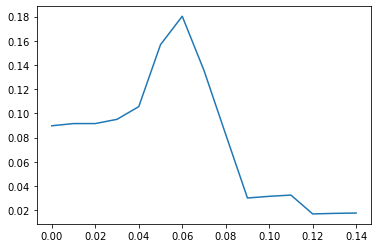

In [109]:
x_plot = [x[0] for x in dane_do_wykr_f1]
y_plot = [x[1] for x in dane_do_wykr_f1]
plt.plot(x_plot,y_plot)        

#### FINALLY the scores are:
- accuracy with threshold = 0.5 ->  0.9528
- AUC -> 0.7089
- F1-Score max with threshold 0.06 = 0.18

## KNeighborsClassifier

In [261]:
from sklearn.neighbors import KNeighborsClassifier

In [262]:
knn = KNeighborsClassifier(n_neighbors=10,weights='distance')

In [263]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [264]:
y_pred = knn.predict(X_val)

In [265]:
auc = roc_auc_score(y_val,y_pred)
auc

0.5028027528027529

In [266]:
price_level = (y_pred>= 0.5)
accu = (y_val == price_level).mean()
accu

0.9490718705378391

In [267]:
average_precision_score(y_val,y_pred)

0.047654556031519385

In [116]:
thresholds = np.linspace(0,1,101)
actual_positive = (y_val ==1)
actual_negative = (y_val == 0)
dane_do_wykr_f1 = []
for t in thresholds:
    predict_positive = (y_pred >=t)
    predict_negative = (y_pred<t)
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    prec = round(tp/(tp+fp),3)
    rec = round(tp / (tp+fn),3)
    F1 = 2 * prec*rec/(prec+rec)
    print(round(t,2), F1)
    dane_do_wykr_f1.append((round(t,2), F1))

0.0 0.0897803247373448
0.01 0.01818181818181818
0.02 0.01818181818181818
0.03 0.01818181818181818
0.04 0.01818181818181818
0.05 0.01818181818181818
0.06 0.01818181818181818
0.07 0.01818181818181818
0.08 0.01818181818181818
0.09 0.01818181818181818
0.1 0.01818181818181818
0.11 0.01818181818181818
0.12 0.01818181818181818
0.13 0.01818181818181818
0.14 0.01818181818181818
0.15 0.01818181818181818
0.16 0.01818181818181818
0.17 0.01818181818181818
0.18 0.01818181818181818
0.19 0.01818181818181818
0.2 0.01818181818181818
0.21 0.01818181818181818
0.22 0.01818181818181818
0.23 0.01818181818181818
0.24 0.01818181818181818
0.25 0.01818181818181818
0.26 0.01818181818181818
0.27 0.01818181818181818
0.28 0.01818181818181818
0.29 0.01818181818181818
0.3 0.01818181818181818
0.31 0.01818181818181818
0.32 0.01818181818181818
0.33 0.01818181818181818
0.34 0.01818181818181818
0.35 0.01818181818181818
0.36 0.01818181818181818
0.37 0.01818181818181818
0.38 0.01818181818181818
0.39 0.01818181818181818
0.4 0

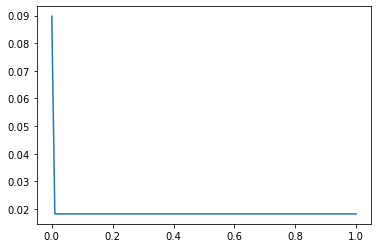

In [77]:
x_plot = [x[0] for x in dane_do_wykr_f1]
y_plot = [x[1] for x in dane_do_wykr_f1]
plt.plot(x_plot,y_plot)        

#### As expected (it is not good model in this problem) the model with the worst score so far

   ## DECISION TREE MODEL
   

In [268]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text


In [304]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)
    

0.7138543274906911

In [305]:
max_depth_roc = []
for md in range(1,15):
    dt = DecisionTreeClassifier(max_depth=md,min_samples_leaf=200)
    dt.fit(X_train,y_train)
    y_pred = dt.predict_proba(X_val)[:,1]
    auc_val = roc_auc_score(y_val, y_pred)
    
    y_pred_t = dt.predict_proba(X_train)[:,1]
    auc_train = roc_auc_score(y_train, y_pred_t)
    max_depth_roc.append((md,round(auc_train,3),round(auc_val,3)))

In [306]:
max_depth_roc

[(1, 0.68, 0.681),
 (2, 0.733, 0.695),
 (3, 0.758, 0.71),
 (4, 0.794, 0.749),
 (5, 0.818, 0.731),
 (6, 0.821, 0.742),
 (7, 0.822, 0.746),
 (8, 0.823, 0.734),
 (9, 0.823, 0.727),
 (10, 0.823, 0.747),
 (11, 0.823, 0.733),
 (12, 0.823, 0.732),
 (13, 0.823, 0.747),
 (14, 0.823, 0.747)]

In [150]:
leaf_min_roc = []
for s in [5,10,25,50,75,100,150,200,300,400,500,1000,2000]:
    dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=s)
    dt.fit(X_train,y_train)
    y_pred = dt.predict_proba(X_val)[:,1]
    auc_val = roc_auc_score(y_val, y_pred)

#    y_pred_t = dt.predict_proba(X_train)[:,1]
#    auc_train = roc_auc_score(y_train, y_pred_t)
    leaf_min_roc.append((s,round(auc_val,3)))

In [307]:
leaf_min_roc

[(5, 0.726),
 (10, 0.715),
 (25, 0.705),
 (50, 0.722),
 (75, 0.729),
 (100, 0.731),
 (150, 0.735),
 (200, 0.749),
 (300, 0.75),
 (400, 0.733),
 (500, 0.716),
 (1000, 0.717),
 (2000, 0.713)]

In [308]:
df_dectree_score = pd.DataFrame(leaf_min_roc,columns = ['min_leaf','auc'])

In [309]:
df_dectree_score.sort_values(by='auc',ascending=False).head(10)

,min_leaf,auc
8,300,0.750
7,200,0.749
6,150,0.735
9,400,0.733
5,100,0.731
4,75,0.729
0,5,0.726
3,50,0.722
11,1000,0.717
10,500,0.716


### FINAL DECISION TREE MODEL

In [310]:
dt = DecisionTreeClassifier(max_depth=4,min_samples_leaf=300)

In [311]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=300)

In [312]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.7503557049011595

In [313]:
succ_lvl = (y_pred>=0.5)
accu = (y_test == succ_lvl).mean()
accu

0.9528795811518325

0.0 0.0897803247373448
0.01 0.12132443531827516
0.02 0.13298193411264614
0.03 0.16749883990719258
0.04 0.17889987937273824
0.05 0.17728822733423544
0.06 0.19331946508172365
0.07 0.19331946508172365
0.08 0.19331946508172365
0.09 0.19331946508172365
0.1 0.21140432098765433
0.11 0.21140432098765433
0.12 0.21140432098765433
0.13 0.15033774834437086
0.14 0.15033774834437086
0.15 0.15033774834437086
0.16 0.15033774834437086
0.17 0.15033774834437086
0.18 nan
0.19 nan
0.2 nan
0.21 nan
0.22 nan
0.23 nan
0.24 nan
0.25 nan
0.26 nan
0.27 nan
0.28 nan
0.29 nan
0.3 nan
0.31 nan
0.32 nan
0.33 nan
0.34 nan
0.35 nan
0.36 nan
0.37 nan
0.38 nan
0.39 nan
0.4 nan
0.41 nan
0.42 nan
0.43 nan
0.44 nan
0.45 nan
0.46 nan
0.47 nan
0.48 nan
0.49 nan
0.5 nan
0.51 nan
0.52 nan
0.53 nan
0.54 nan
0.55 nan
0.56 nan
0.57 nan
0.58 nan
0.59 nan
0.6 nan
0.61 nan
0.62 nan
0.63 nan
0.64 nan
0.65 nan
0.66 nan
0.67 nan
0.68 nan
0.69 nan
0.7 nan
0.71 nan
0.72 nan
0.73 nan
0.74 nan
0.75 nan
0.76 nan
0.77 nan
0.78 nan
0.79 nan
0

<ipython-input-314-81a0430bfea7>:12: RuntimeWarning: invalid value encountered in long_scalars
  prec = round(tp/(tp+fp),3)


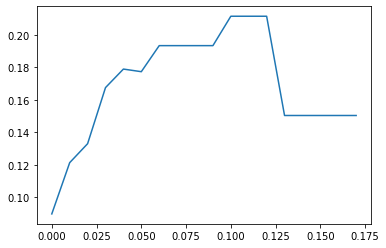

In [314]:
thresholds = np.linspace(0,1,101)
actual_positive = (y_val ==1)
actual_negative = (y_val == 0)
dane_do_wykr_f1 = []
for t in thresholds:
    predict_positive = (y_pred >=t)
    predict_negative = (y_pred<t)
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    prec = round(tp/(tp+fp),3)
    rec = round(tp / (tp+fn),3)
    F1 = 2 * prec*rec/(prec+rec)
    print(round(t,2), F1)
    dane_do_wykr_f1.append((round(t,2), F1))
x_plot = [x[0] for x in dane_do_wykr_f1]
y_plot = [x[1] for x in dane_do_wykr_f1]
plt.plot(x_plot,y_plot)        

In [315]:
average_precision_score(y_val,y_pred)

0.11813297091047939

### DECISION TREE MODEL Scores:
- accu: 0.9528795811518325
- AOC: 0.7534687534687534
- F1 Score: max 0.21
- average precision score = 0.118
### Better performance than logistic regression

# RANDOM FOREST

In [161]:
from sklearn.ensemble import RandomForestClassifier

In [162]:
rf = RandomForestClassifier(n_estimators=20, max_depth=4,min_samples_leaf=300, random_state=1,n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=300, n_estimators=20,
                       n_jobs=-1, random_state=1)

In [163]:
y_pred = rf.predict_proba(X_val)[:,1]

In [164]:
roc_auc_score(y_val, y_pred)

0.7524344342526161

In [166]:
rf_auc_n = []

for n in range(10,210,10):
    rf = RandomForestClassifier(n_estimators=n, max_depth=6,min_samples_leaf=30, random_state=1,n_jobs=-1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    rf_auc_n.append((n,round(auc,3)))

In [167]:
rf_auc_n

[(10, 0.752),
 (20, 0.749),
 (30, 0.757),
 (40, 0.767),
 (50, 0.769),
 (60, 0.772),
 (70, 0.772),
 (80, 0.77),
 (90, 0.768),
 (100, 0.767),
 (110, 0.766),
 (120, 0.767),
 (130, 0.766),
 (140, 0.767),
 (150, 0.767),
 (160, 0.766),
 (170, 0.767),
 (180, 0.766),
 (190, 0.767),
 (200, 0.766)]

In [183]:
rf_auc_n = []

for n in range(10,310,10):
    for md in [2,4,6,8,10,12,14]:
        for s in [10,20,25,30,50,100,200,300]:
            rf = RandomForestClassifier(n_estimators=n, max_depth=md,min_samples_leaf=50, random_state=1,n_jobs=-1)
            rf.fit(X_train, y_train)
    
            y_pred = rf.predict_proba(X_val)[:,1]
            auc = roc_auc_score(y_val, y_pred)
            rf_auc_n.append((md,n,s,round(auc,3)))

In [188]:
df_rf_score = pd.DataFrame(rf_auc_n, columns = ['md','s','n','auc'])
df_rf_score.sort_values('auc',ascending=False).head(30)

,md,s,n,auc
320,12,60,10,0.776
379,12,70,30,0.776
387,14,70,30,0.776
388,14,70,50,0.776
389,14,70,100,0.776
390,14,70,200,0.776
391,14,70,300,0.776
335,14,60,300,0.776
334,14,60,200,0.776
333,14,60,100,0.776


In [289]:
rf_auc_n_s = []

for n in range(10,210,10):
    for s in [10,20,25,30,50,100,200,300]:
        rf = RandomForestClassifier(n_estimators=n, max_depth=12, min_samples_leaf=s, random_state=1,n_jobs=-1)
        rf.fit(X_train, y_train)
    
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        rf_auc_n_s.append((s,n,round(auc,3)))

In [290]:
df_rf_score_s = pd.DataFrame(rf_auc_n_s, columns = ['m_leaf','n','auc'])
df_rf_score_s.sort_values('auc',ascending=False).head(10)

,m_leaf,n,auc
52,50,70,0.776
44,50,60,0.776
76,50,100,0.774
84,50,110,0.774
68,50,90,0.774
60,50,80,0.774
28,50,40,0.774
116,50,150,0.773
92,50,120,0.773
100,50,130,0.773


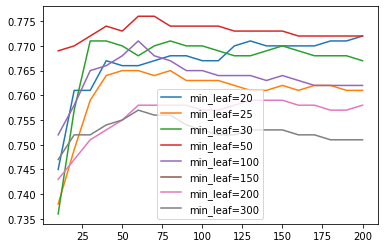

In [291]:
for s in [20,25,30,50,100,150,200,300]:
    df_subset = df_rf_score_s[df_rf_score_s.m_leaf == s]
    plt.plot(df_subset.n,df_subset.auc, label = 'min_leaf=%s' %s)
plt.legend()

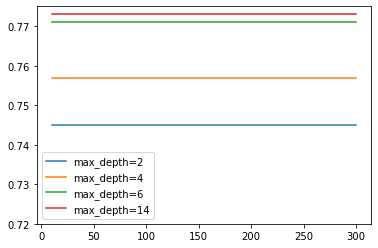

In [292]:
for d in [2,4, 6, 14]:
    df_subset = df_rf_score[(df_rf_score.md == d)&(df_rf_score.s==50)]
    plt.plot(df_subset.n,df_subset.auc, label = 'max_depth=%s' %d)
plt.ylim(0.72,0.775)
plt.legend()

Lets's try max_features

In [293]:
rf_auc_max_feat = []

for m_f in range(1,15):
    rf = RandomForestClassifier(n_estimators=180, max_depth=12, min_samples_leaf=50 , random_state=1,n_jobs=-1, max_features = m_f)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    rf_auc_max_feat.append((m_f,round(auc,3)))

In [294]:
df_rf_max_feat = pd.DataFrame(rf_auc_max_feat, columns = ['max_feat','auc'])
df_rf_max_feat.sort_values('auc',ascending=False).head(10)

,max_feat,auc
10,11,0.779
8,9,0.777
11,12,0.777
12,13,0.776
13,14,0.776
9,10,0.774
3,4,0.773
4,5,0.773
2,3,0.772
6,7,0.771


## final RandomForest

In [297]:
rf = RandomForestClassifier(n_estimators=180, max_depth=12, min_samples_leaf=50, random_state=1,n_jobs=-1, max_features = 11)

In [298]:
rf.fit(X_train, y_train)
    
y_pred = rf.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, y_pred)
auc

0.7789357107538926

In [299]:
succ_lvl = (y_pred_test>=0.5)
accu = (y_test == succ_lvl).mean()
accu

0.9500237981913374

In [300]:
y_pred

array([0.00129473, 0.06080273, 0.04618329, ..., 0.01793579, 0.04621225,
       0.1466672 ])

In [301]:
succ_lvl = (y_pred>=0.5)
accu = (y_test == succ_lvl).mean()
accu

0.9528795811518325

<ipython-input-302-588ae3b36ed3>:14: RuntimeWarning: invalid value encountered in double_scalars
  F1 = 2 * prec*rec/(prec+rec)
<ipython-input-302-588ae3b36ed3>:12: RuntimeWarning: invalid value encountered in long_scalars
  prec = round(tp/(tp+fp),3)


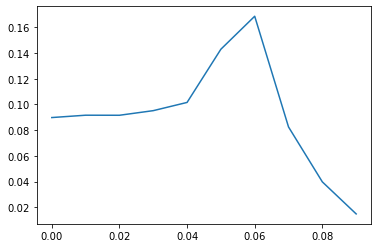

In [302]:
thresholds = np.linspace(0,1,101)
actual_positive = (y_test ==1)
actual_negative = (y_test == 0)
dane_do_wykr_f1 = []
for t in thresholds:
    predict_positive = (y_pred_test >=t)
    predict_negative = (y_pred_test<t)
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    prec = round(tp/(tp+fp),3)
    rec = round(tp / (tp+fn),3)
    F1 = 2 * prec*rec/(prec+rec)
    dane_do_wykr_f1.append((round(t,2), F1))
x_plot = [x[0] for x in dane_do_wykr_f1]
y_plot = [x[1] for x in dane_do_wykr_f1]
plt.plot(x_plot,y_plot)        

In [303]:
average_precision_score(y_val,y_pred)

0.2102963812566988

### RANDOM FOREST MODEL Scores:
    -accu: 0.9528795811518325
    -AOC: 0.779
    -F1 Score: max 0.17
    - average precision score = 0.21
AUC little bit better than decision tree, F1 Score max a little worse.

# CNN KERAS

In [316]:
from tqdm.keras import TqdmCallback
from tensorflow import keras

In [439]:
inputs = keras.layers.Input(shape=(14,))

inner=keras.layers.Dense(14, activation='relu')(inputs)
drop = keras.layers.Dropout(0.3)(inner)
inner=keras.layers.Dense(14,activation='relu')(drop)
drop = keras.layers.Dropout(0.2)(inner)
outputs = keras.layers.Dense(1,activation='sigmoid')(drop)


model = keras.Model(inputs,outputs)


learning_rate = 0.005
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
loss = keras.losses.BinaryCrossentropy()
auc = keras.metrics.AUC()
accuracy = keras.metrics.binary_accuracy

model.compile(optimizer=optimizer, loss=loss, metrics=[auc,accuracy])

In [440]:
history = model.fit(
    X_train, y_train,
    batch_size =1024,
    epochs=200,
    verbose=0,
    validation_data=(X_val,y_val),
    callbacks=[TqdmCallback()]
)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

In [328]:
y_pred = model.predict(X_val)

In [438]:
history.history

{'loss': [0.6070255637168884,
  0.5788180232048035,
  0.552598774433136,
  0.5163835883140564,
  0.48783543705940247,
  0.466206431388855,
  0.4446372985839844,
  0.41613566875457764,
  0.3967653512954712,
  0.37978315353393555,
  0.3516802191734314,
  0.3355165719985962,
  0.32829681038856506,
  0.3081633150577545,
  0.29048439860343933,
  0.2823646068572998,
  0.2747878432273865,
  0.2623177170753479,
  0.25851860642433167,
  0.25691840052604675,
  0.24525243043899536,
  0.23696313798427582,
  0.24293862283229828,
  0.2392553836107254,
  0.22975033521652222,
  0.23219001293182373,
  0.2241087704896927,
  0.22718507051467896,
  0.22452324628829956,
  0.2121831774711609,
  0.21931776404380798,
  0.2147229015827179,
  0.21265767514705658,
  0.21611672639846802,
  0.21353435516357422,
  0.20824238657951355,
  0.21048685908317566,
  0.20752480626106262,
  0.20291584730148315,
  0.19982820749282837,
  0.20060788094997406,
  0.19709977507591248,
  0.20336931943893433,
  0.21267230808734894,

In [329]:
thresholds = np.linspace(0,1,101)
actual_positive = (y_val ==1)
actual_negative = (y_val == 0)
dane_do_wykr_f1 = []
for t in thresholds:
    predict_positive = (y_pred >=t)
    predict_negative = (y_pred<t)
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    prec = round(tp/(tp+fp),3)
    rec = round(tp / (tp+fn),3)
    F1 = 2 * prec*rec/(prec+rec)
    print(round(t,2), F1)
    dane_do_wykr_f1.append((round(t,2), F1))


0.0 0.0897803247373448
0.01 0.08898524404086265
0.02 0.08791460055096419
0.03 0.08672158154859967
0.04 0.08507474747474748
0.05 0.08314496314496315
0.06 0.08096755162241888
0.07 0.07793454545454545
0.08 0.07373394495412844
0.09 0.06903954802259887
0.1 0.06331944444444444
0.11 0.05383636363636364
0.12 0.04140476190476191
0.13 0.03177464788732394
0.14 0.01649122807017544
0.15 0.009038461538461539
0.16 0.0
0.17 nan
0.18 nan
0.19 nan
0.2 nan
0.21 nan
0.22 nan
0.23 nan


<ipython-input-329-96b9c87ddcda>:12: RuntimeWarning: invalid value encountered in long_scalars
  prec = round(tp/(tp+fp),3)


0.24 nan
0.25 nan
0.26 nan
0.27 nan
0.28 nan
0.29 nan
0.3 nan
0.31 nan
0.32 nan
0.33 nan
0.34 nan
0.35 nan
0.36 nan
0.37 nan
0.38 nan
0.39 nan
0.4 nan
0.41 nan
0.42 nan
0.43 nan
0.44 nan
0.45 nan
0.46 nan
0.47 nan
0.48 nan
0.49 nan
0.5 nan
0.51 nan
0.52 nan
0.53 nan
0.54 nan
0.55 nan
0.56 nan
0.57 nan
0.58 nan
0.59 nan
0.6 nan
0.61 nan
0.62 nan
0.63 nan
0.64 nan
0.65 nan
0.66 nan
0.67 nan
0.68 nan
0.69 nan
0.7 nan
0.71 nan
0.72 nan
0.73 nan
0.74 nan
0.75 nan
0.76 nan
0.77 nan
0.78 nan
0.79 nan
0.8 nan
0.81 nan
0.82 nan
0.83 nan
0.84 nan
0.85 nan
0.86 nan
0.87 nan
0.88 nan
0.89 nan
0.9 nan
0.91 nan
0.92 nan
0.93 nan
0.94 nan
0.95 nan
0.96 nan
0.97 nan
0.98 nan
0.99 nan
1.0 nan


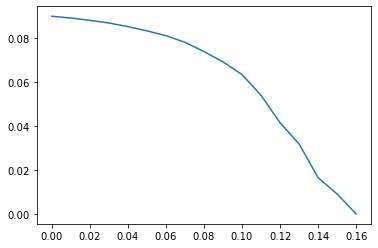

In [330]:
x_plot = [x[0] for x in dane_do_wykr_f1]
y_plot = [x[1] for x in dane_do_wykr_f1]
plt.plot(x_plot,y_plot)        

In [331]:
average_precision_score(y_val,y_pred)

0.13259311119350714

scores.append('keras',0.133

# XGBoost

In [332]:
import xgboost as xgb

In [333]:
df_train.columns

Index(['x35', 'x25', 'x24', 'x1', 'x48', 'x18', 'x33', 'x36', 'x55', 'x12',
       'x57', 'x30', 'x54', 'x61'],
      dtype='object')

In [334]:
features = df_train.columns

In [340]:

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
watch_list = [(dtrain, 'train'),(dval, 'val)')]

In [343]:

xgb_params = {
    'eta': 0.1, 
    'max_depth': 5,
    'min_child_weight': 11,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 4,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, evals=watch_list, verbose_eval=5, num_boost_round=200)

[0]	train-auc:0.72924	val)-auc:0.70567
[5]	train-auc:0.82202	val)-auc:0.76068
[10]	train-auc:0.85169	val)-auc:0.76381
[15]	train-auc:0.87487	val)-auc:0.75531
[20]	train-auc:0.88505	val)-auc:0.76094
[25]	train-auc:0.89411	val)-auc:0.76519
[30]	train-auc:0.90012	val)-auc:0.76963
[35]	train-auc:0.90515	val)-auc:0.77106
[40]	train-auc:0.91356	val)-auc:0.77646
[45]	train-auc:0.91998	val)-auc:0.77903
[50]	train-auc:0.92385	val)-auc:0.78174
[55]	train-auc:0.92728	val)-auc:0.78182
[60]	train-auc:0.93091	val)-auc:0.78082
[65]	train-auc:0.93449	val)-auc:0.78200
[70]	train-auc:0.93903	val)-auc:0.78207
[75]	train-auc:0.94216	val)-auc:0.78064
[80]	train-auc:0.94434	val)-auc:0.78284
[85]	train-auc:0.94682	val)-auc:0.78341
[90]	train-auc:0.94964	val)-auc:0.78290
[95]	train-auc:0.95310	val)-auc:0.78213
[100]	train-auc:0.95563	val)-auc:0.78087
[105]	train-auc:0.95695	val)-auc:0.78026
[110]	train-auc:0.95962	val)-auc:0.77917
[115]	train-auc:0.96113	val)-auc:0.77897
[120]	train-auc:0.96318	val)-auc:0.778

In [349]:
auc_xgb_list = []
for et in [0.3,0.1,0.05]:
    xgb_params['eta'] = et
    model = xgb.train(xgb_params, dtrain, evals=watch_list, verbose_eval=5, num_boost_round=200)
    y_pred = model.predict(dval)
    auc = roc_auc_score(y_val,y_pred)
    auc_xgb_list.append((et,round(auc,3)))

[0]	train-auc:0.74425	val)-auc:0.71459
[5]	train-auc:0.86416	val)-auc:0.75011
[10]	train-auc:0.88055	val)-auc:0.76626
[15]	train-auc:0.89404	val)-auc:0.76564
[20]	train-auc:0.90946	val)-auc:0.76284
[25]	train-auc:0.92323	val)-auc:0.76157
[30]	train-auc:0.93302	val)-auc:0.76657
[35]	train-auc:0.94173	val)-auc:0.76157
[40]	train-auc:0.94825	val)-auc:0.75495
[45]	train-auc:0.95269	val)-auc:0.75410
[50]	train-auc:0.95848	val)-auc:0.75207
[55]	train-auc:0.96394	val)-auc:0.74996
[60]	train-auc:0.96792	val)-auc:0.74656
[65]	train-auc:0.97014	val)-auc:0.74969
[70]	train-auc:0.97291	val)-auc:0.74899
[75]	train-auc:0.97588	val)-auc:0.74751
[80]	train-auc:0.97769	val)-auc:0.74718
[85]	train-auc:0.97961	val)-auc:0.74604
[90]	train-auc:0.98274	val)-auc:0.74656
[95]	train-auc:0.98356	val)-auc:0.74543
[100]	train-auc:0.98468	val)-auc:0.74241
[105]	train-auc:0.98566	val)-auc:0.74391
[110]	train-auc:0.98685	val)-auc:0.74547
[115]	train-auc:0.98813	val)-auc:0.74724
[120]	train-auc:0.98912	val)-auc:0.747

In [350]:
def parse_xgb_output(output):
    results = []
    
    
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')
        
        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1]) 
        results.append((it,train,val))
                       
                       
    columns = ['num_iter','auc_train','auc_val']
    df_results = pd.DataFrame(results,columns=columns)
    return df_results

In [359]:
%%capture output
xgb_params = {
    'eta': 0.25, 
    'max_depth': 5,
    'min_child_weight': 20,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 4,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, evals=watch_list,  num_boost_round=100)

In [360]:
df_xgb = parse_xgb_output(output)

In [361]:
df_xgb.sort_values('auc_val',ascending=False)

,num_iter,auc_train,auc_val
19,19,0.88920,0.78021
21,21,0.89317,0.77841
22,22,0.89620,0.77774
20,20,0.89034,0.77759
15,15,0.88198,0.77726
...,...,...,...
6,6,0.85924,0.75506
3,3,0.83565,0.75364
2,2,0.82195,0.75345
1,1,0.78808,0.73030


In [362]:
df_xgb.auc_train

0     0.74038
1     0.78808
2     0.82195
3     0.83565
4     0.84502
       ...   
95    0.96325
96    0.96395
97    0.96422
98    0.96444
99    0.96468
Name: auc_train, Length: 100, dtype: float64

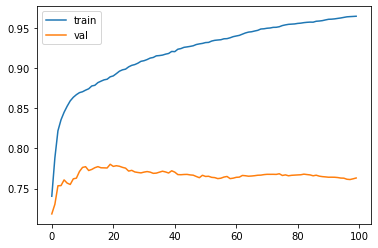

In [363]:
plt.plot(df_xgb.num_iter, df_xgb['auc_train'], label= 'train')
plt.plot(df_xgb.num_iter, df_xgb.auc_val, label= 'val')
plt.legend()


In [364]:
xgb_scores = {}

In [371]:
%%capture output
xgb_params = {
    'eta': 0.20, 
    'max_depth': 10,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 4,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, evals=watch_list,  num_boost_round=200)

In [372]:
key = 'eta=%s' % (xgb_params['eta'])
xgb_scores[key] = parse_xgb_output(output)

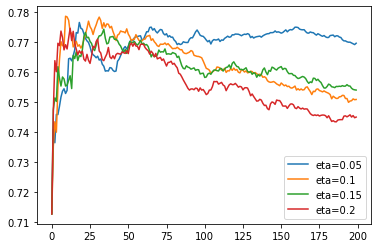

In [373]:
for key, df_scores in xgb_scores.items():
    plt.plot(df_scores.num_iter, df_scores['auc_val'], label= key)
#plt.ylim(0.4,1)
plt.legend()

### eta = 0.05 or 0.10

Now max_depth

In [374]:
xgb_max_d_scores = {}

In [390]:
%%capture output
xgb_params = {
    'eta': 0.1, 
    'max_depth': 12,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 4,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, evals=watch_list,  num_boost_round=185)

In [391]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
xgb_max_d_scores[key] = parse_xgb_output(output)

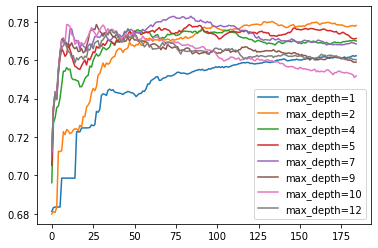

In [392]:
for key, df_scores in xgb_max_d_scores.items():
    plt.plot(df_scores.num_iter, df_scores['auc_val'], label= key)
#plt.ylim(0.79,0.82)
plt.legend()

#### max_depth = 2  in higher boost round or 10 in lower boost round
Now  -  min_child_weight

In [413]:
xgb_min_ch_scores = {}

In [417]:
%%capture output
xgb_params = {
    'eta': 0.05, 
    'max_depth': 7,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 4,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, evals=watch_list,  num_boost_round=185)

In [418]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
xgb_min_ch_scores[key] = parse_xgb_output(output)

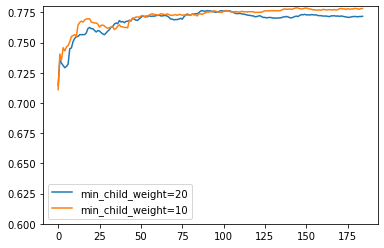

In [419]:
for key, df_scores in xgb_min_ch_scores.items():
    plt.plot(df_scores.num_iter, df_scores['auc_val'], label= key)
plt.ylim(0.6,0.78)
plt.legend()

# FINAL MODEL - XGBOOST
### slightly better than rest of the trained models

In [423]:

xgb_params = {
    'eta': 0.1, 
    'max_depth': 7,
    'min_child_weight': 10,
    'colsample_bytree':1,
    'subsample': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 4,

    'seed': 1,
    'verbosity': 1,
}


dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)


model = xgb.train(xgb_params, dtrain,  verbose_eval=5, num_boost_round=75)

In [424]:
y_pred = model.predict(dval)

In [427]:
y_pred

array([0.0046019 , 0.04031418, 0.07061636, ..., 0.02696727, 0.02083306,
       0.21007809], dtype=float32)

In [425]:
roc_auc_score(y_val, y_pred)

0.7827450327450327

0.0 0.0897803247373448
0.01 0.13066666666666668
0.02 0.14772143634385201
0.03 0.162236276849642
0.04 0.18250623441396507
0.05 0.20530576441102757
0.06 0.21209379310344825
0.07 0.21175412293853074
0.08 0.2287160120845921
0.09 0.2463732928679818
0.1 0.23547529812606477
0.11 0.23831064572425828
0.12 0.22694049904030708
0.13 0.23363241106719368
0.14 0.2275490605427975
0.15 0.24175303643724694
0.16 0.24193839835728956
0.17 0.232
0.18 0.21725400457665903
0.19 0.20241951219512191
0.2 0.1907817258883249
0.21 0.19018719211822657
0.22 0.16534554973821988
0.23 0.1616029411764706
0.24 0.15260048426150122
0.25 0.12719363395225464
0.26 0.09807073954983922
0.27 0.09888819875776397
0.28 0.08692173913043479
0.29 0.05405940594059406
0.3 0.05454545454545455
0.31 0.05555555555555555
0.32 0.05555555555555555
0.33 0.056078431372549024
0.34 0.056078431372549024
0.35 0.056078431372549024
0.36 0.03809523809523809
0.37 0.03809523809523809
0.38 0.03809523809523809
0.39 0.03809523809523809
0.4 0.03809523809523809

<ipython-input-426-5f94c5a502d0>:13: RuntimeWarning: invalid value encountered in long_scalars
  prec = round(tp/(tp+fp),3)


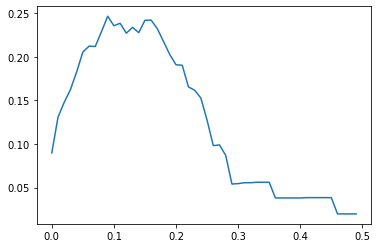

In [426]:
thresholds = np.linspace(0,1,101)
actual_positive = (y_val ==1)
actual_negative = (y_val == 0)
dane_do_wykr_f1 = []
prec_rec = []
for t in thresholds:
    predict_positive = (y_pred >=t)
    predict_negative = (y_pred<t)
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    prec = round(tp/(tp+fp),3)
    rec = round(tp / (tp+fn),3)
    F1 = 2 * prec*rec/(prec+rec)
    print(round(t,2), F1)
    prec_rec.append((t, prec,rec))
    dane_do_wykr_f1.append((round(t,2), F1))
x_plot = [x[0] for x in dane_do_wykr_f1]
y_plot = [x[1] for x in dane_do_wykr_f1]
plt.plot(x_plot,y_plot)        

In [ ]:
succ_lvl = (y_pred>=0.16)
accu = (y_test == succ_lvl).mean()
accu

In [428]:
average_precision_score(y_val,y_pred)

0.1741343586030173

### SCORES:
- accu with threshold 0.5 =  0.95287958
- AUC 0.7859842178023997
- F1-score -> max 0.2374
- accu in threshold 0.16 = 0.9105 (0.16 - point with the highest F1-score)
- average_precision_score = 0.17

In [460]:
f_scores = pd.read_clipboard()


In [483]:
f_scores

,Model,ROC_AUC,F1 score,avg prec score
0,CNN keras,0.755,0.0900,0.1330
1,random-forest,0.779,0.1700,0.2100
2,decision tree,0.755,0.2100,0.1200
3,KK-Neighbours,0.503,0.0900,0.0480
4,logistic regression,0.709,0.1800,0.1035
5,xgboost,0.786,0.2374,0.1700


## DECISION:
- xgbboost is the best in ROC_AC and f1-score. 
I choose this model

#### Checking performance in  full train and test split

In [462]:
df_test


,x35,x25,x24,x1,x48,x18,x33,x36,x55,x12,x57,x30,x54,x61
0,0.151930,-0.087251,-0.007776,0.152830,0.157020,0.158240,3.1366,3.44810,-69.8300,0.150580,-3.005700,0.273050,6.708568,6.2170
1,0.222810,0.618800,0.616280,0.126400,0.096733,0.126400,5.8848,2.46560,6418.5000,0.331660,0.204230,0.147530,1.947600,5.0723
2,0.210270,0.768120,0.265070,0.037245,0.033178,0.049947,4.2403,0.67663,4.6727,0.447640,0.045835,0.113510,1.699500,4.0839
3,0.119480,0.077660,0.077660,0.066227,0.038511,0.066227,7.3369,5.13110,1069.6000,0.095691,0.215080,0.134510,7.512800,5.6534
4,-0.339340,0.053235,-0.200760,-0.426400,-0.386570,-0.426400,6.5213,5.36830,-104.7000,-0.487180,-4.604200,0.121300,0.635130,15.7920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,0.372160,0.079395,1.269000,0.356580,0.356850,0.356580,3.5278,3.23370,-486.4600,0.439600,1.887900,0.249050,0.414960,14.0730
2097,0.030261,0.380020,0.275530,0.006341,-0.002582,0.008542,3.3502,1.73970,7416.0000,0.016943,0.016687,0.261810,1.331000,4.0602
2098,0.129270,0.871060,0.628770,0.112170,0.075722,0.138350,5.6874,0.76937,9132.6000,1.262200,0.128780,0.051021,1.554100,2.5573
2099,0.023026,0.710240,0.106780,0.004314,-0.025391,0.017209,4.1254,0.82598,10428.0000,0.089489,0.006074,0.354300,1.199000,5.2037


In [465]:
df_full_train.drop('x29',1,inplace=True)
X_full_train = sc_X.transform(np.array(df_full_train))

In [466]:
X_full_train.shape

(8402, 14)

In [467]:

dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=features)
dtest = xgb.DMatrix(X_test, label=y_test,  feature_names=features)

model = xgb.train(xgb_params, dfulltrain,  verbose_eval=5, num_boost_round=75)

In [468]:
y_pred = model.predict(dtest)


In [469]:
roc_auc_score(y_test, y_pred)

0.7768822087003905

In [472]:
average_precision_score(y_test,y_pred)

0.16276362413356968

0.0 0.0897803247373448
0.01 0.1161630988786952
0.02 0.14469296375266527
0.03 0.1653978021978022
0.04 0.17824912689173458
0.05 0.19523132530120482
0.06 0.1981179554390564
0.07 0.21271836734693877
0.08 0.22111815561959658
0.09 0.2449786628733997
0.1 0.21367741935483872
0.11 0.20972564612326042
0.12 0.21614604462474646
0.13 0.21522851153039835
0.14 0.21833832976445394
0.15 0.22336363636363638
0.16 0.2239519650655022
0.17 0.2277
0.18 0.23265236051502147
0.19 0.22925490196078432
0.2 0.23315498938428875
0.21 0.2064
0.22 0.19527529411764707
0.23 0.16534554973821988
0.24 0.17005405405405405
0.25 0.10723448275862069
0.26 0.10968589743589742
0.27 0.11144848484848484
0.28 0.1160822622107969
0.29 0.0876694214876033
0.3 0.08845312500000001
0.31 0.09006880733944954
0.32 0.07142091152815014
0.33 0.07272727272727272
0.34 0.07338842975206612
0.35 0.05555555555555555
0.36 0.037385620915032676
0.37 0.01887005649717514
0.38 0.01887005649717514
0.39 nan
0.4 nan
0.41 nan
0.42 nan
0.43 nan
0.44 nan
0.45 nan


<ipython-input-474-7b39f1149aba>:15: RuntimeWarning: invalid value encountered in double_scalars
  F1 = 2 * prec*rec/(prec+rec)
<ipython-input-474-7b39f1149aba>:13: RuntimeWarning: invalid value encountered in long_scalars
  prec = round(tp/(tp+fp),3)


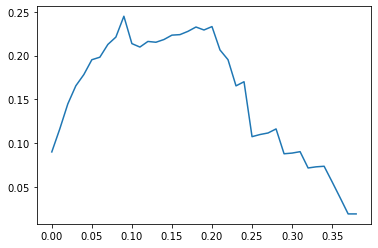

In [474]:
thresholds = np.linspace(0,1,101)
actual_positive = (y_test ==1)
actual_negative = (y_test == 0)
dane_do_wykr_f1 = []
prec_rec = []
for t in thresholds:
    predict_positive = (y_pred >=t)
    predict_negative = (y_pred<t)
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    prec = round(tp/(tp+fp),3)
    rec = round(tp / (tp+fn),3)
    F1 = 2 * prec*rec/(prec+rec)
    print(round(t,2), F1)
    prec_rec.append((t, prec,rec))
    dane_do_wykr_f1.append((round(t,2), F1))
x_plot = [x[0] for x in dane_do_wykr_f1]
y_plot = [x[1] for x in dane_do_wykr_f1]
plt.plot(x_plot,y_plot)        

In [475]:
tester = np.array(df_test.iloc[-1100])
test_arr = tester.reshape(1,len(tester))
test_arr.shape

(1, 14)

In [476]:
model.feature_names

['x35',
 'x25',
 'x24',
 'x1',
 'x48',
 'x18',
 'x33',
 'x36',
 'x55',
 'x12',
 'x57',
 'x30',
 'x54',
 'x61']

In [477]:
X_tester = sc_X.transform(test_arr)
X_tester

array([[-0.03939289,  0.07500932, -0.11583775, -0.00939272, -0.00122538,
        -0.01256204, -0.14048721, -0.42142507, -0.0689293 , -0.02312328,
        -0.01418585, -0.02576842, -0.08541529, -0.13184356]])

In [ ]:
tester = np.array(df_test.iloc[-1000])

In [478]:
dtest = xgb.DMatrix(X_tester,  feature_names=features)
prediction = model.predict(dtest)

In [479]:
prediction

array([0.00884697], dtype=float32)

## SAVING THE MODEL

In [480]:
import pickle


In [481]:
with open('bankruptcy.bin', 'wb') as f_out:
    pickle.dump((model), f_out)

I decided to put the threshold at the point with the highest F1 score = 0.16